Exploring decision tree model and it's variations, including random forest,s and boosted trees (XGBoost).

In decision tree construction, concept of purity is based on the fraction of the data elements in the group that belong to the subset. Purity refers to the homogeneity of the target variable within a node. A node is considered "pure" if all the data instances within it belong to the same class or have the same target value. Conversely, an "impure" node contains a mixture of different classes or target values.

The goal of a decision tree algorithm is to recursively split the data at each node in a way that maximizes the purity of the resulting child nodes. This process aims to create leaf nodes that are as pure as possible, meaning they predominantly contain instances of a single class, allowing for clear and accurate predictions.

In [1]:
import numpy as np

#### Entropy as a measure of impurity

This measure quantifies the level of uncertainty or randomness within a dataset regarding its class labels. A pure node has an entropy of 0, while maximum impurity corresponds to an entropy of 1 (for a binary classification problem).

Given **$p_{1}$ as the fraction of examples belonging to a specific class**, the entropy can be represented as in following figure with function $H$. Thus, if $p_{1} = 3/6 = 0.5$, $H(p_{1}) = 1.0$, which means maximum impurity/entropy of 1, unlike when $p_{1} = 6/6$ or $0/6$ which will give entropy/impurity = 0.

Another examples,
* $p_{1} = 5/6$, $H(p_{1}) = 0.65$
* $p_{1} = 6/6$, $H(p_{1}) = 0.00$

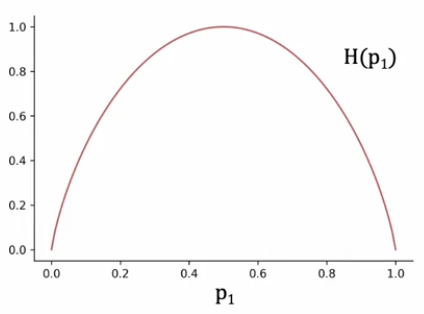

The entropy can be represented as:

$H(p_{1}) = -p_{1}log_{2}(p_{1}) - -p_{0}log_{2}(p_{0})$

where,
$p_{0} = 1 - p_{1}$

note,
$0 \times log(0) = 0$

In [29]:
def entropy(p1, epsilon = 1e-12):
    p0 = 1 - p1
    
    h = -p1*np.log2(p1 + epsilon) - p0*np.log2(p0 + epsilon)

    return round(max(0, h), 2)
    
entropy(0)

0

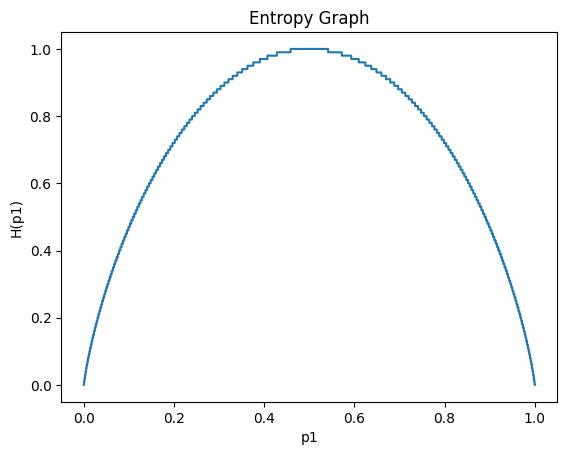

In [35]:
import matplotlib.pyplot as plt

x = np.arange(0, 1.00002, 0.00002)
y = [entropy(i) for i in x]

# Create the plot
plt.plot(x, y)

# Add labels and title (optional but recommended)
plt.xlabel("p1")
plt.ylabel("H(p1)")
plt.title("Entropy Graph")

# Display the plot
plt.show()